# Support Vector Machine

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression that finds the optimal hyperplane which separates data points of different classes with the maximum margin.

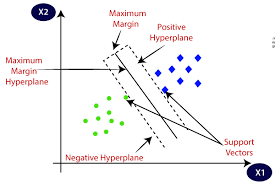

## Types of Support Vector Machine

Based on the nature of the decision boundary, Support Vector Machine (SVM) can be divided into two main parts.

## 1. Linear SVM

Linear SVM uses a linear decision boundary to separate the data points of different classes. When the data can be precisely linearly separated, linear SVMs are very suitable. This means that a **single straight line (in 2D)** or a **hyperplane (in higher dimensions)** can entirely divide the data points into their respective classes. A hyperplane that maximizes the margin between **the classes is the decision boundary.**

## 2. Non-Linear SVM

Non-linear SVM can be used to classify data when it cannot be separated into two classes by a straight line (in the case of 2D). By using kernel functions, non-linear SVMs can handle non-linearly separable data.

The original input data is transformed by these kernel functions into a higher-dimensional feature space where the data points can be linearly separated. A linear SVM is used to locate a non-linear decision boundary in this modified space.

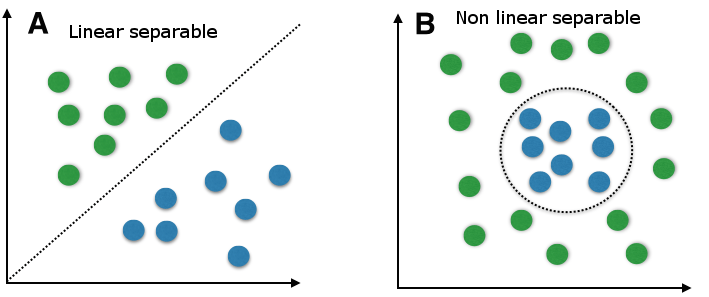

## Step 1: Dataset

| Student | Study-hour | Attendance | Result |
|--------|------------|------------|--------|
| S1 | 2 | 60 | 0 (Fail) |
| S2 | 3 | 65 | 0 (Fail) |
| S3 | 5 | 75 | 1 (Pass) |
| S4 | 6 | 80 | 1 (Pass) |
| S5 | 7 | 85 | 1 (Pass) |

### Binary Classification
- Pass = 1  
- Fail = 0  

## Step 2: Visual Understanding

- ↓ Study-hour + ↓ Attendance → Fail  
- ↑ Study-hour + ↑ Attendance → Pass  


## Step 3: Assume Hyperplane

$$
w_1 x_1 + w_2 x_2 + b = 0
$$

Where:
$$ x_1 \rightarrow \text{Study-hour} $$
$$ x_2 \rightarrow \text{Attendance} $$


## Step 4: SVM Constraint

$$
y_i (w \cdot x_i + b) \geq 1
$$

- Pass students lie on one side  
- Fail students lie on the other side  
- Margin is maximized


## Step 5: Identify Support Vectors

- S2 (3, 65) → Fail  
- S3 (5, 75) → Pass  

Therefore, these points decide the hyperplane.

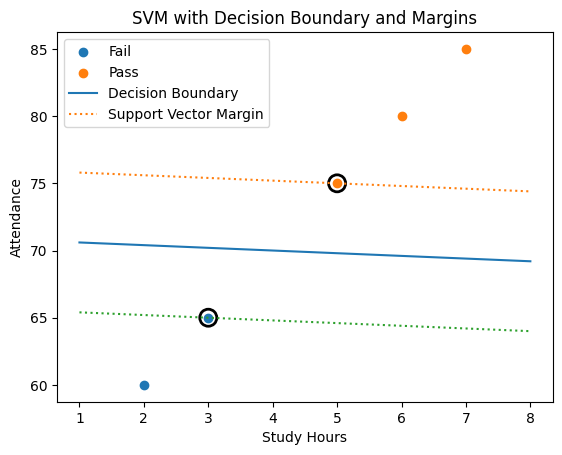

## Step 6: Example Hyperplane

$$
w_1 = 1,\quad w_2 = 0.1,\quad b = -10
$$

So equation becomes:

$$
\begin{aligned}
w_1 x_1 + w_2 x_2 + b &= 0 \\
(1)x_1 + (0.1)x_2 + (-10) &= 0 \\
x_1 + 0.1x_2 - 10 &= 0
\end{aligned}
$$


## Step 7

### For S1 (2, 60)

$$
\begin{aligned}
2 + 0.1(60) - 10 &= 2 + 6 - 10 \\
                 &= 8 - 10 \\
                 &= -2 \quad (\text{Fail})
\end{aligned}
$$

### For S4 (6, 80)

$$
\begin{aligned}
6 + 0.1(80) - 10 &= 6 + 8 - 10 \\
                 &= 14 - 10 \\
                 &= 4 \quad (\text{Pass})
\end{aligned}
$$


## Step 8: Decision Function (Prediction Formula)

$$
f(x) = \text{sign}(wx + b)
$$

- **Output** +1 → Pass  
- **Output** −1 → Fail

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [2]:
data = {
    "Study_Hours": [2, 3, 5, 6, 7],
    "Attendance": [60, 65, 75, 80, 85],
    "Result": ["Fail", "Fail", "Pass", "Pass", "Pass"]
}

df = pd.DataFrame(data)
print(df)

   Study_Hours  Attendance Result
0            2          60   Fail
1            3          65   Fail
2            5          75   Pass
3            6          80   Pass
4            7          85   Pass


In [3]:
df["Result"] = df["Result"].map({"Fail": 0, "Pass": 1})
print(df)

   Study_Hours  Attendance  Result
0            2          60       0
1            3          65       0
2            5          75       1
3            6          80       1
4            7          85       1


In [4]:
X = df[["Study_Hours", "Attendance"]]   # features
y = df ["Result"]    # target

In [5]:
model = SVC(kernel="linear")
model.fit(X, y)

SVC(kernel='linear')

In [6]:
w = model.coef_[0]
b = model.intercept_[0]

print(w)
print(b)

[0.03846154 0.19230769]
-13.615384615384613


In [7]:
new_student = pd.DataFrame({
    "Study_Hours": [4],
    "Attendance": [70]

})

prediction = model.predict(new_student)

if prediction[0] == 1:
    print("Prediction: Pass")
else:
    print("Prediction: Fail")

Prediction: Pass


In [8]:
x_vals = np.linspace(X["Study_Hours"].min()-1, X["Study_Hours"].max()+1, 100)
#(w1*x1+b)/w2
y_vals = -(w[0] * x_vals + b) / w[1]

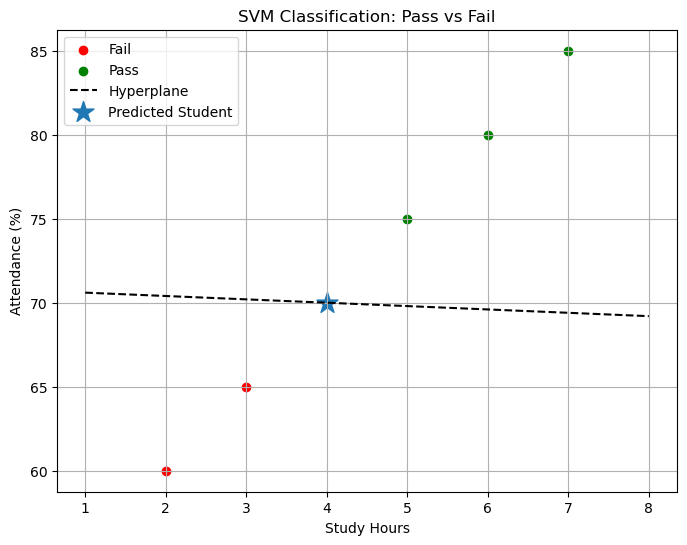

In [9]:
plt.figure(figsize=(8, 6))

# Separate data
fail = df[df.iloc[:, 2] == 0]   # Result column
pass_ = df[df.iloc[:, 2] == 1]

# Fail points
plt.scatter(
    fail.iloc[:, 0],   # Study Hours
    fail.iloc[:, 1],   # Attendance
    color="red",
    label="Fail"
)

# Pass points
plt.scatter(
    pass_.iloc[:, 0],
    pass_.iloc[:, 1],
    color="green",
    label="Pass"
)

# Hyperplane
plt.plot(x_vals, y_vals, "k--", label="Hyperplane")

# Predicted point (NUMPY ARRAY)
plt.scatter(
    new_student.iloc[0, 0],
    new_student.iloc[0, 1],
    marker="*",
    s=250,
    label="Predicted Student"
)

plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.title("SVM Classification: Pass vs Fail")
plt.legend()
plt.grid(True)
plt.show()